# Рекомендация тарифов

# Описание проекта
Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

 В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.
 
 
Постройте модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте accuracy на тестовой выборке самостоятельно.

# Инструкция по выполнению проекта

* Разделите исходные данные на обучающую, валидационную и тестовую выборки.



* Исследуйте качество разных моделей, меняя гиперпараметры. Кратко напишите выводы исследования.



* Проверьте качество модели на тестовой выборке.



* Дополнительное задание: проверьте модели на вменяемость. Ничего страшного, если не получится: эти данные сложнее тех, с которыми вы работали раньше. В следующем курсе подробнее об этом расскажем.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.ensemble import RandomForestClassifier
import matplotlib
from sklearn.linear_model import LogisticRegression 

In [2]:
try: 
    data = pd.read_csv('/Users/Sergej/Desktop/Practicum/Project_ml1/users_behavior.csv')
except: 
    data = pd.read_csv('/datasets/users_behavior.csv')

### 1) Посмотрим на датасет и разделим данные.
Вообще говоря, признаки могут быть разными, но мы возьмем все кроме `is_ultra`, его мы будем предсказывать. Все признаки нам подходят, потому что каждый столбец несет информацию, которая влияет на выбор тарифа. 

Затем разделим данные на обучающую, валидационную и тестовую выборки в соотношении 60% / 20% / 20% от общей выборки соответственно. 

In [3]:
display(data)
data.info()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
data['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

Видно, что наш датасет уже подготовлен, он не содержит пропусков и неправильных форматов данных. Отметим, что количество пользоваталей тарифа "Ультра" более, чем в два раза меньше обычных пользователей.  

In [5]:
target = data['is_ultra']
features = data.drop(['is_ultra'], axis=1)

In [6]:
# сначала выделим 20% для тестовой выборки, 80% останется
features1, features_test, target1, target_test = train_test_split(
features, target, test_size=0.2, random_state=12345, stratify=target)

# затем из оставшейся выборки возьмем 33% для валидационной выборки и 67% для обучающей
features_train, features_valid, target_train, target_valid = train_test_split(
    features1, target1, test_size=0.33, random_state=12345, stratify=target1)

### 2) Модель дерева с разными гиперпараметрами.
Будем менять параметр `max_depth` в диапазоне от 1 до 10

In [7]:
depths = list(range(1,21))
score_valid = []
score_train = []

for depth in depths: 
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    
    predictions = model.predict(features_valid)
    score_valid.append(accuracy_score(target_valid, predictions))
    
    predictions = model.predict(features_train)
    score_train.append(accuracy_score(target_train, predictions))

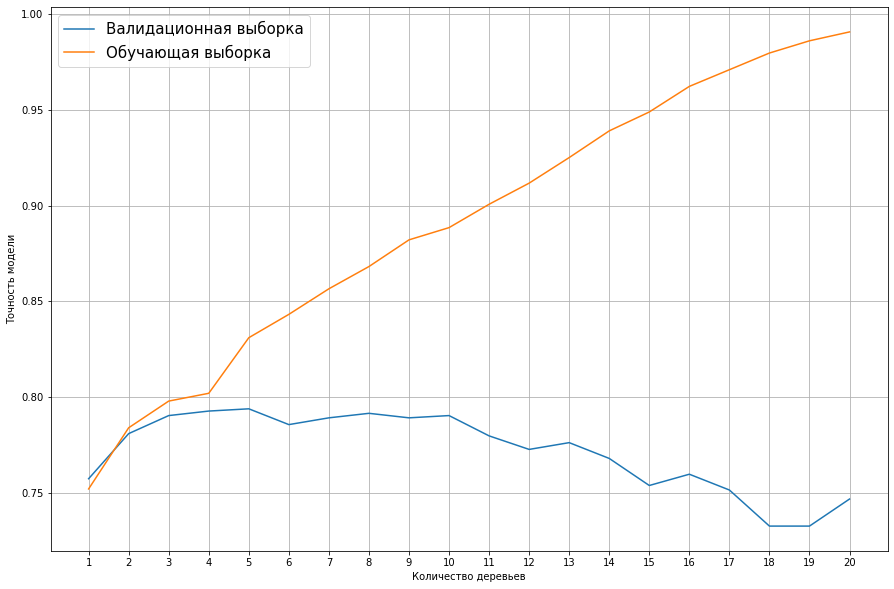

In [8]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot()

ax.plot(depths, score_valid, label='Валидационная выборка')
ax.plot(depths, score_train, label='Обучающая выборка')

ax.set_xlabel('Количество деревьев')
ax.set_ylabel('Точность модели')

ax.grid()

plt.rc('font', size=15) #controls default text size
plt.rc('axes', titlesize=15) #fontsize of the title
plt.rc('axes', labelsize=15) #fontsize of the x and y labels
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels
plt.rc('legend', fontsize=15) #fontsize of the legend

plt.legend()

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))


In [9]:
score_valid = list(zip(list(range(1,21)),score_valid))
print('Глубина и точность валидационной выборки (лучшая модель): ')
tree_depth = max(score_valid, key= lambda x: x[1])[0]
print(*max(score_valid, key= lambda x: x[1]), sep='; ')


# score_test = list(zip(list(range(1,11)),score_test))
# print('Глубина и точность тестовой выборки (лучшая модель): ')
# print(*max(score_test, key= lambda x: x[1]), sep='; ')

Глубина и точность валидационной выборки (лучшая модель): 
5; 0.7938751472320377


На графике точности от глубины дерева можем видеть, что модель достигает своей точности на 5 уровне, а далее начинает переобучаться и дает все больше неправильных ответов. 

### 3) Модель случайного леса с разными гиперпараметрами.
Будем перебирать количество деревьев леса путем изменения параметра `n_estimators`

CPU times: user 50.2 s, sys: 166 ms, total: 50.4 s
Wall time: 50.4 s


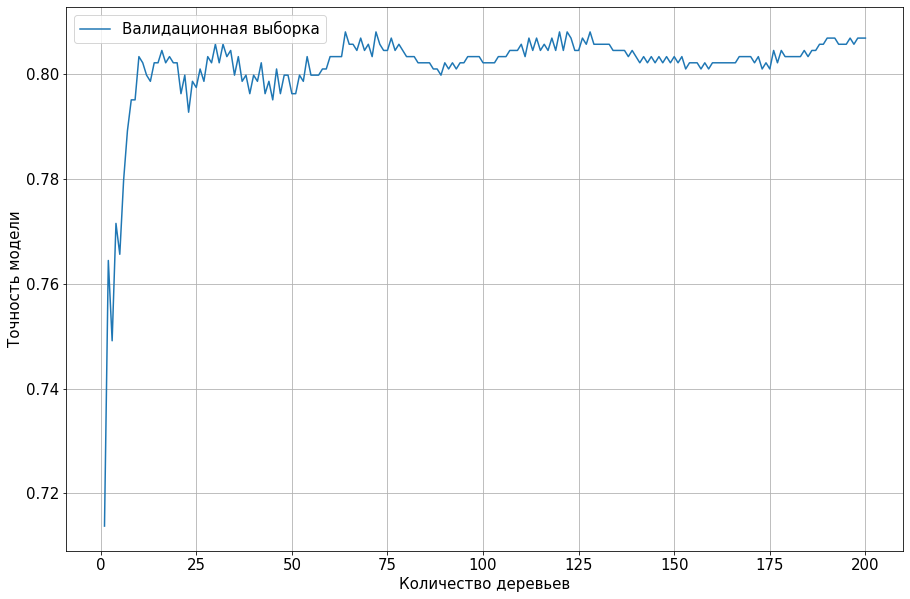

In [10]:
%%time
estimators = list(range(1,201))

score_test = []
score_valid = []
best_score=0
best_est=0
for est in estimators:
    model = RandomForestClassifier(n_estimators=est, random_state=12345)
    model.fit(features_train, target_train)
      
    predictions = model.predict(features_valid)
    score = model.score(features_valid, target_valid)
    score_valid.append(score)
    if score > best_score: 
        forest = model
        best_score = score 
        best_est = est
#     predictions = model.predict(features_test)
#     score_test.append(model.score(features_test, target_test))

    

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot()
ax.plot(estimators, score_valid, label='Валидационная выборка')
# ax.plot(estimators, score_test, label='Тестовая выборка')
ax.set_xlabel('Количество деревьев')
ax.set_ylabel('Точность модели')
ax.grid()
plt.rc('font', size=15) #controls default text size
plt.rc('axes', titlesize=15) #fontsize of the title
plt.rc('axes', labelsize=15) #fontsize of the x and y labels
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels
plt.rc('legend', fontsize=15) #fontsize of the legend
plt.legend()

In [11]:
# print('Валидационная выборка:', round(max(score_test),3))
print('Валидационная выборка:', best_est, 'деревьев', ', точность -',round(best_score, 3))

Валидационная выборка: 64 деревьев , точность - 0.808


Для достижения оптимальной точности следует взять 64 дерева. При таком количестве мы получаем точность более 80%, более того, для 60 деревьев наш алгоритм будет работать гораздо быстрее, чем для 200. 

#### Проверка лучшей модели случайного леса на тестовой выборке. 
Обучим нашу модель на тренировочной и валидационной выборках и посмотрим на точность в тестовой выборке

In [12]:
train_features = pd.concat([features_valid, features_train]) 
train_target = pd.concat([target_valid, target_train])

In [13]:
forest.fit(train_features, train_target)
print('Точность на тестовой выборке:', round(forest.score(features_test, target_test), 3))

Точность на тестовой выборке: 0.804


Модель случайного леса показала точность 81%, этот показатель выше, чем у дерева решений.

### 3) Модель логистической регрессии с разными гиперпараметрами.

Будем изменять параметр `max_iter` в диапазаоне от 100 до 2000 с шагом 10.

In [14]:
iterations = list(range(90,510,10))
lg_test_score = []
lg_valid_score = []
best_score = 0
for iteration in iterations: 
    model = LogisticRegression(max_iter=iteration, solver='lbfgs', random_state=12345)
    model.fit(features_train, target_train)
    
    score = model.score(features_test, target_test)
    lg_valid_score.append(score)
    if score > best_score:  
        logistic = model

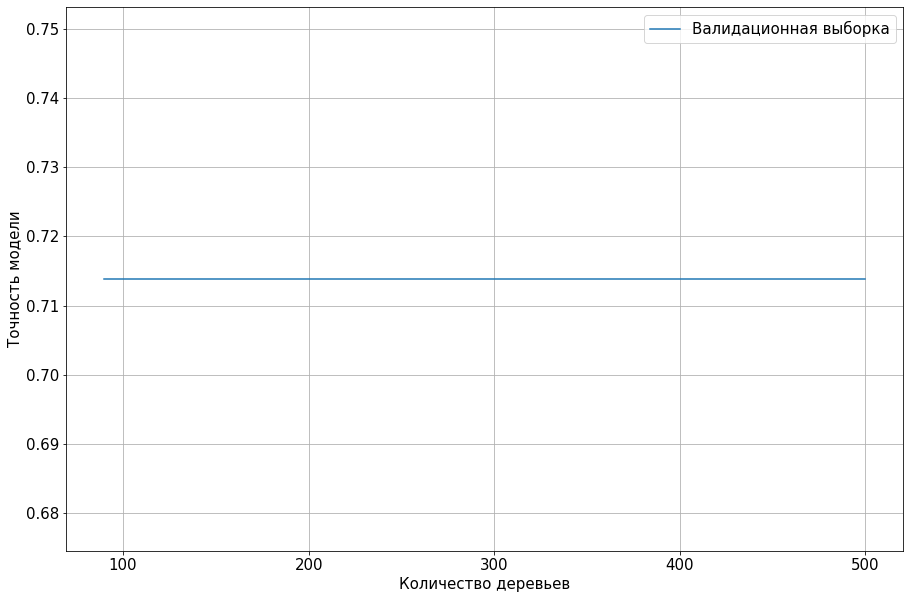

In [15]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot()
ax.plot(iterations, lg_valid_score, label='Валидационная выборка')
# ax.plot(iterations, lg_test_score, label='Тестовая выборка')
ax.set_xlabel('Количество деревьев')
ax.set_ylabel('Точность модели')
ax.grid()
plt.rc('font', size=15) #controls default text size
plt.rc('axes', titlesize=15) #fontsize of the title
plt.rc('axes', labelsize=15) #fontsize of the x and y labels
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels
plt.rc('legend', fontsize=15) #fontsize of the legend
plt.legend()

In [16]:
print('Валидационная выборка:', round(max(lg_valid_score),3))

Валидационная выборка: 0.714


Модель логистической регрессии показывает одинаковую точность при max_iter >= 90. Точность модели 71,4% - этот показатель ниже, чем у дерева решений и модели случайного леса. 

###  Проверка лучшей модели на тестовой выборке.
В ходе тестирования на валидационной выборке выяснилось, что модель случайного леса имеет самую высокую точность. Возьмем эту подель для тестовой выборки.

In [17]:
forest.fit(train_features, train_target)
print('Точность на тестовой выборке:', round(forest.score(features_test, target_test), 3))

Точность на тестовой выборке: 0.804


На тестовой выборке модель показала приблизительно такую же высокую точность, как и на валидационной.

## Проверка моделей на вменяемость. 

### Описание тарифов

#### Тариф «Смарт»

* Ежемесячная плата: 550 рублей

* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика


Стоимость услуг сверх тарифного пакета:
* Минута разговора — 3 рубля. Количество использованных минут и мегабайтов «Мегалайн» всегда округляет вверх. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

* Сообщение — 3 рубля.

* 1 Гб интернет-трафика— 200 рублей.

#### Тариф «Ультра»

* Ежемесячная плата: 1950 рублей

* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика


Стоимость услуг сверх тарифного пакета:

* Минута разговора — 1 рубль;

* Сообщение — 1 рубль;

* 1 Гб интернет-трафика: 150 рублей.


Возьмем данные, где значения столбца is_ultra = 0 и посмотрим, какая точность будет у наших моделей. Предполагается, модели должны вывести списки, где нули встречаются в большей степени.

In [18]:
tree = DecisionTreeClassifier(max_depth=5, random_state=12345)

data_train = data[data['is_ultra']==0]
check_features = data_train.drop(['is_ultra'], axis=1)
check_target = data_train['is_ultra']
tree.fit(train_features, train_target)

print('Точность лучшей модели дерева решений:', round(tree.score(check_features, check_target), 3))
print('Точность лучшей модели случайного леса:',round(forest.score(check_features, check_target), 3))
print('Точность модели логистической регрессии: ',round(logistic.score(check_features, check_target), 3))

Точность лучшей модели дерева решений: 0.938
Точность лучшей модели случайного леса: 0.984
Точность модели логистической регрессии:  0.986


#### Вменяемость

Проверка на самом частом классе is_ultra=0, показала, что модели дают вполне вменяемы результаты. Однако модель дерева решений справляется с тривальными тестами сложнее 93.8% правильных ответов, в отличие от моделей случайного леса и логистической регрессии. 


# Выводы

Было построено три модели с различными гиперпараметрами: дерево решений, случайный лес и логистическая регрессии.

* Оптимальным параметром глубины дерева решений является 5. При такой глубине модель выдает наиболее точные ответы. Точность правильных ответов на валидационной выборке 79%


* В процессе изменения количеста деревьев в модели случайного лесы было вявлено, что наибольшая точность достигается, при 64 деревьев, дальнешее увеличение числа деревьев не приводит к повышению точности. Стоит отметить, что модель случайного леса работает дольше двух остальных, но точность (порядка 81%) на валидационной и тестовой выборках у нее больше всех остальных моделей. 


* Для логистической регрессии при максимальном количестве итераций, превышающем 80, точность модели была неизменной - 71% 


* Все модели неплохо справились с тривиальными тестами, но стоит отметить, что модель дерева решений не так хорошо справилась с тестом, где все элементы принимали значение 0, она решила его только на 94%. 